## Plots
Trackster collection efficiency (= fraction of gen-matched tracksters clustered in superclusters)

PU contamination (= fraction of non-gen-matched tracksters clustered in superclusters)

In [2]:
%load_ext autoreload
%autoreload 2
import uproot
import numpy as np
import awkward as ak
import matplotlib.pyplot as plt
import mplhep as hep
import hist

import sys
sys.path.append("/workspaces/cmssw/analyzer")
from tools import *

In [8]:
ak.flatten(uproot.open("../runs/AlessandroElectronSamples/histo.root:ticlDumper/superclustering")["superclusteringDNNScore.dnnScore_"].array(), axis=None)

<Array [0, 0, 0, 0, 0, 0, ..., 0.0195, 0, 0, 0, 0, 0] type='2772602 * float32'>

In [15]:
1100634*10.08/2772602 * 8

32.0114916457537

In [169]:
file = uproot.open("../runs_results/histo.root:ticlDumper")

In [170]:
tracksters = file["tracksters"].arrays()
tracksters

<Array [{event: 926234935, ...}, ..., {...}] type='100 * {event: uint32, NC...'>

In [171]:
simTracksters = file["simtrackstersSC"].arrays()
simTracksters

<Array [{event: 926234935, ...}, ..., {...}] type='100 * {event: uint32, NT...'>

In [172]:
assoc = assocs_zip(file["associations"].arrays(filter_name="tsCLUE3D_recoToSim_SC*"))
assoc

<Array [[[{ts_id: 0, ...}, ...], ...], ...] type='100 * var * var * {ts_id:...'>

In [173]:
supercls = file["superclustering/superclusteredTracksters"].array()
supercls

<Array [[[2224, 1837, ..., 2650], ...], ...] type='100 * var * var * uint64'>

In [174]:
tracksters[[key for key in tracksters.fields if key not in ["event", "NClusters", "NTracksters"]]]

<Array [{time: [-99, ...], ...}, ..., {...}] type='100 * {time: var * float...'>

In [175]:
# highest energy trackster
idx_sort = ak.argsort(tracksters.raw_energy, ascending=True)
ak.firsts(tracksters[[key for key in tracksters.fields if key not in ["event", "NClusters", "NTracksters"]]][idx_sort], axis=-1)

<Array [{time: -99, timeError: -1, ...}, ...] type='100 * {time: ?float32, ...'>

In [176]:
assocs_toDf(assoc, score_threshold=0.5)

simts_id     score     sharedE
eventInternal ts_id                                
0             725           0  0.014176  171.615585
              726           0  0.263702    1.684353
              779           0  0.011399  156.731949
              919           0  0.002152    0.899077
              943           0  0.006391    1.117790
              970           0  0.252532    1.490481
              996           0  0.061414   18.221033
              1029          0  0.028046    1.042927
              1030          0  0.053845   13.257915
              1061          0  0.090902    0.821634
              1127          0  0.039504    0.694512
              1152          0  0.224197    0.719804
              2224          6  0.358056   75.850548
              2308          6  0.346121   67.482903
              2558         15  0.174773    1.100142
              2626          6  0.377561    4.837765
              2650          6  0.465013    0.560392
              2651          6  0.383099    7.172993
1             500           0  0.051577   45.659126
              586           0  0.049535   46.092541
              732           0  0.077280   45.554863
              773           0  0.273304    1.268686
              774           0  0.038964   48.527630
              1557         19  0.438721    2.228572
              1800         35  0.480534    1.391824
...                       ...       ...         ...
97            1444          4  0.221648    0.529838
              1445          4  0.343894    2.156904
              2707          8  0.047853   45.291767
              2863          8  0.046524   40.181377
              2913          8  0.242144    5.011145
              3179          8  0.008461   93.961693
              3219          8  0.009364  104.601227
              3339          8  0.441323    0.641698
              3466          8  0.426482    1.772308
              3475          8  0.361501    0.626519
98            659           0  0.361097   24.402065
              757           0  0.306591   28.226173
              2470         25  0.454380   26.015324
99            704           0  0.393328   54.401817
              802           0  0.364463   13.719070
              812           0  0.382207   59.129772
              959           0  0.363147    0.279703
              2746         35  0.078838   32.456799
              3007         28  0.042715  124.235291
              3059         28  0.035135  121.464500
              3218         28  0.458971    1.185685
              3277         28  0.380423    1.145985
              3302         28  0.468706    0.832379
              3306         28  0.222839    1.181486
              3417         28  0.493572    0.584322

[1326 rows x 3 columns]

In [177]:
supercls[0]

<Array [[2224, 1837, 1983, ..., 2532, 2650], ...] type='3065 * var * uint64'>

In [178]:
pd.set_option('display.min_rows', 50)
df = tracksters_joinWithSimTracksters(tracksters, simTracksters, assoc, score_threshold=None)
df

raw_energy  barycenter_x  barycenter_y  barycenter_z  \
eventInternal ts_id                                                         
0             0        2.601894    -65.418518     -8.148056   -323.803558   
              1        0.919743    -28.320337     10.693385   -322.610962   
              2        4.611061    -18.820597     35.571804   -326.077209   
              3        3.419645     39.747494     27.992208   -325.152588   
              4        3.578358    -11.194903     39.533981   -323.015228   
              5        5.422264    -19.127239     67.110626   -326.267303   
              6        0.880746    -30.557871     78.740631   -322.969910   
              7        1.325076      8.626051     75.125008   -323.801270   
              8        3.213538    -37.288601    -34.046928   -326.043182   
              9        4.016378    -11.944739    -39.410305   -328.679291   
              10       2.043948    -44.560188     77.416573   -324.894501   
              11       1.968693    -86.918892    -26.070438   -325.167175   
              12       4.079508    -42.849251    -67.479576   -326.160217   
              13       1.704124     15.281025    -87.427422   -322.975616   
              14       0.985890    104.653313    -23.292032   -323.006104   
              15       1.694040     20.509287   -108.982048   -323.008240   
              16       0.677196     -2.767113    -97.551361   -322.485443   
              17       1.269257     29.335020      5.278339   -323.171570   
              18       3.743369     56.063122      0.873258   -327.935608   
              19       1.589473    -30.332281      6.806818   -324.846252   
              20       0.975057    -48.873695     -1.312417   -323.226379   
              21       4.252007     28.423506     20.521584   -324.687134   
              22       1.114351     39.992939      6.080312   -324.729370   
              23       2.086003     47.609154      9.533421   -324.720398   
              24       1.187163     51.426891     16.121620   -324.435455   
...                         ...           ...           ...           ...   
99            4112     1.617375     43.088982    -58.328259    417.052612   
              4113     2.675534    109.394852    120.044830    415.952301   
              4114     2.502947     39.653976     26.992056    404.565979   
              4115     2.215442    -29.876205    -44.199150    424.760986   
              4116     2.575470     50.169956    -43.381065    412.707611   
              4117     0.921644     -9.388195    -73.116875    417.219818   
              4118     2.519527     67.033371    181.727341    420.225128   
              4119     2.093158    -57.823807     -5.035799    424.035065   
              4120     1.920181     23.245249     32.965889    421.526001   
              4121     2.742694      9.249404     47.353157    421.666962   
              4122     0.959661     18.603157    -32.164490    422.423401   
              4123     1.332455    -23.077122    -82.312210    420.492004   
              4124     2.676860    -24.311523     53.096416    418.813751   
              4125     0.950716    -11.257468    -43.765717    428.639404   
              4126     2.309154     23.108192    -44.000172    435.889801   
              4127     1.248687   -156.418701   -141.504242    430.353851   
              4128     1.471427    -39.092850    -39.882725    436.659973   
              4129     2.975925    156.948364    -53.901016    440.444153   
              4130     1.619888    136.765472   -136.083435    429.633575   
              4131     1.852273      3.862664     52.755993    441.578491   
              4132     1.550074     18.088961    -48.614197    451.424591   
              4133     1.105888    -17.782230   -126.775482    460.044006   
              4134     1.051301    -31.372215     43.397400    485.248993   
              4135     2.009458     30.627161    131.352707    478.915619   
              413

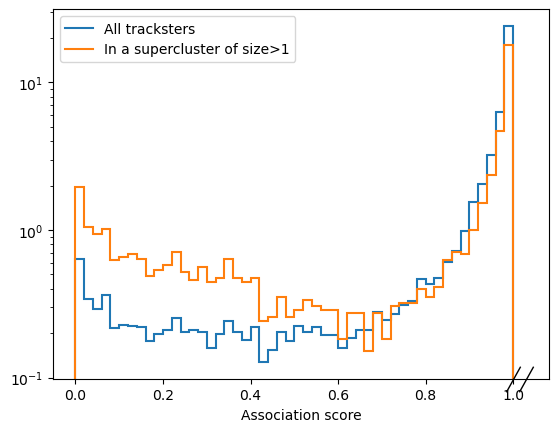

In [179]:
h_allTracksters = hist.Hist(hist.axis.Regular(50, 0, 1, name="score", label="Association score"))
h_allTracksters.fill(df.score)
h_inSuperCluster = hist.Hist(hist.axis.Regular(50, 0, 1, name="score", label="Association score"))
h_inSuperCluster.fill(ak.flatten(assocs_bestScore(assoc)[ak.flatten(supercls[ak.num(supercls, axis=-1)>1], axis=-1)].score))

hep.histplot([h_allTracksters, h_inSuperCluster], yerr=False, density=True, label=["All tracksters", "In a supercluster of size>1"])
plt.yscale("log")
plt.legend()

In [180]:
supercls[ak.num(supercls, axis=-1)>1]

<Array [[[2224, 1837, ..., 2650], ...], ...] type='100 * var * var * uint64'>

In [181]:
supercls

<Array [[[2224, 1837, ..., 2650], ...], ...] type='100 * var * var * uint64'>

In [182]:
file["simtrackstersCP"].arrays()[["regressed_energy", "raw_energy"]]

<Array [{regressed_energy: [...], ...}, ...] type='100 * {regressed_energy:...'>

In [183]:
file["associations"].arrays(filter_name="tsCLUE3D_simToReco_CP*")

<Array [{tsCLUE3D_simToReco_CP: ..., ...}, ...] type='100 * {tsCLUE3D_simTo...'>

In [184]:
supercls_ts_idx = supercls[superclusterAssociatedToSimTracksterCP(supercls, file["associations"].arrays(filter_name="tsCLUE3D_simToReco_CP*"))]
supercls_ts_idx

<Array [[[725, 76, 779, 920], [...]], ...] type='100 * var * var * uint64'>

In [185]:
supercls_en = ak.flatten(superclustersToEnergy(supercls_ts_idx, tracksters))
sim_en = ak.flatten(file["simtrackstersCP"]["regressed_energy"].array())
supercls_en, sim_en

(<Array [375, 388, 135, 170, 267, ..., 139, 86.5, 354, 372] type='200 * float32'>,
 <Array [414, 414, 252, 252, 557, ..., 131, 131, 363, 363] type='200 * float32'>)

In [186]:
h = hist.Hist(hist.axis.Regular(50, 0, 2))
h.fill(supercls_en/sim_en)

Hist(Regular(50, 0, 2, label='Axis 0'), storage=Double()) # Sum: 199.0 (200.0 with flow)